En Cirq, la implementación de las compuertas de Hadamard y las operaciones Toffoli es directa con métodos como cirq.H() y cirq.TOFFOLI().
En Qiskit, las operaciones de Hadamard se logran con qc.h(), y la operación Toffoli se realiza con mcx (controlada por múltiples qubits).


Resultados de las mediciones:
{'000': 7, '001': 10, '010': 12, '011': 9, '100': 11, '101': 950, '110': 14, '111': 11}

Circuito:
0: ───H───────@───────H───X───────@───X───H───────────@───────H───X───────@───X───H───────M('result')───
              │                   │                   │                   │               │
1: ───H───X───@───X───H───X───────@───X───H───────X───@───X───H───X───────@───X───H───────M─────────────
              │                   │                   │                   │               │
2: ───H───H───X───H───H───X───H───X───H───X───H───H───X───H───H───X───H───X───H───X───H───M─────────────


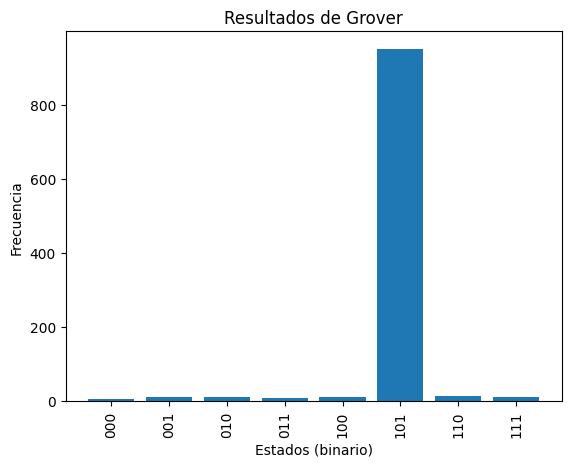

In [11]:
import cirq
import numpy as np
import matplotlib.pyplot as plt

def grover_oracle(qubits, marked_state):
    """Crea el oráculo de Grover que invierte la fase del estado marcado"""
    oracle = cirq.Circuit()
    
    for i, bit in enumerate(marked_state):
        if bit == '0':
            oracle.append(cirq.X(qubits[i]))
    
    oracle.append(cirq.H(qubits[-1]))
    oracle.append(cirq.TOFFOLI(qubits[0], qubits[1], qubits[2]))  # Para n=3
    oracle.append(cirq.H(qubits[-1]))
    
    for i, bit in enumerate(marked_state):
        if bit == '0':
            oracle.append(cirq.X(qubits[i]))
    
    return oracle

def grover_diffusion(qubits):
    """Implementa la difusión de Grover para amplificar el estado marcado"""
    diffusion = cirq.Circuit()
    diffusion.append(cirq.H.on_each(*qubits))
    diffusion.append(cirq.X.on_each(*qubits))
    
    diffusion.append(cirq.H(qubits[-1]))
    diffusion.append(cirq.TOFFOLI(qubits[0], qubits[1], qubits[2]))  # Para n=3
    diffusion.append(cirq.H(qubits[-1]))
    
    diffusion.append(cirq.X.on_each(*qubits))
    diffusion.append(cirq.H.on_each(*qubits))
    
    return diffusion

def grover_algorithm(n, marked_state, iterations=1):
    """Implementa el algoritmo de Grover"""
    qubits = cirq.LineQubit.range(n)
    circuit = cirq.Circuit()
    
    circuit.append(cirq.H.on_each(*qubits))
    
    oracle = grover_oracle(qubits, marked_state)
    diffusion = grover_diffusion(qubits)
    
    for _ in range(iterations):
        circuit.append(oracle)
        circuit.append(diffusion)
    
    circuit.append(cirq.measure(*qubits, key='result'))
    
    return circuit, qubits

def run_grover(n, marked_state, shots=1024):
    """Ejecuta el algoritmo de Grover y muestra los resultados"""
    iterations = int(np.pi / 4 * np.sqrt(2**n))
    circuit, qubits = grover_algorithm(n, marked_state, iterations)
    
    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=shots)
    counts = result.histogram(key='result')
    
    # Convertir las claves a binario y ordenarlas
    formatted_counts = {format(key, f'0{n}b'): value for key, value in sorted(counts.items())}
    
    return formatted_counts, circuit

def plot_histogram(counts):
    """Grafica un histograma de los resultados"""
    sorted_keys = sorted(counts.keys())
    sorted_values = [counts[key] for key in sorted_keys]
    
    plt.bar(sorted_keys, sorted_values)
    plt.xlabel("Estados (binario)")
    plt.ylabel("Frecuencia")
    plt.title("Resultados de Grover")
    plt.xticks(rotation=90)
    plt.show()

n = 3
marked_state = "101"

counts, circuit = run_grover(n, marked_state)
print("\nResultados de las mediciones:")
print(counts)
print("\nCircuito:")
print(circuit)

plot_histogram(counts)